# Before you start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In this lab, we will explore a dataset that describes websites with different features and label them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the dataset from [here](https://drive.google.com/file/d/18LRRR60T-7NbUeZPCSI1crjo8O3LeGhc/view?usp=sharing), place it in the data folder and load it in variable `websites`

In [2]:
websites = pd.read_csv('../data/website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for more exploration. Make sure to comment what you find!

In [3]:
# Your code here
pd.set_option('display.max_columns', None)
websites.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,7,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,17,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,0,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,31,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,57,2,5,4278,61,62,129889,4586,61,4.0,0


In [4]:
websites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   URL_LENGTH                 1781 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 3   CHARSET                    1781 non-null   object 
 4   SERVER                     1780 non-null   object 
 5   CONTENT_LENGTH             969 non-null    float64
 6   WHOIS_COUNTRY              1781 non-null   object 
 7   WHOIS_STATEPRO             1781 non-null   object 
 8   WHOIS_REGDATE              1781 non-null   object 
 9   WHOIS_UPDATED_DATE         1781 non-null   object 
 10  TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 11  DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 12  REMOTE_IPS                 1781 non-null   int64  
 13  APP_BYTES                  1781 non-null   int64

In [5]:
len(websites)

1781

##### Your comment here
<font color='grey'>
content_length has quite some missing values; DNS_QUERY_TIMES misses 1 value.<br>
dtypes seems to fit the data in the columns<br>
"None" is recorded as string in some columns, so there is more data missing than you'd expect based on the info() outcome
</font>

#### Next, evaluate if the columns in this dataset are strongly correlated.

In class, we discussed that we are concerned if our dataset has strongly correlated columns because if this is the case we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

In [6]:
# Your code here
websites_num = websites._get_numeric_data()
websites_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL_LENGTH                 1781 non-null   int64  
 1   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 2   CONTENT_LENGTH             969 non-null    float64
 3   TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 4   DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 5   REMOTE_IPS                 1781 non-null   int64  
 6   APP_BYTES                  1781 non-null   int64  
 7   SOURCE_APP_PACKETS         1781 non-null   int64  
 8   REMOTE_APP_PACKETS         1781 non-null   int64  
 9   SOURCE_APP_BYTES           1781 non-null   int64  
 10  REMOTE_APP_BYTES           1781 non-null   int64  
 11  APP_PACKETS                1781 non-null   int64  
 12  DNS_QUERY_TIMES            1780 non-null   float64
 13  Type                       1781 non-null   int64

In [7]:
websites_corr = websites_num.corr()
websites_corr

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
URL_LENGTH,1.000000,0.917986,0.129745,-0.038407,-0.039839,-0.046367,-0.026446,-0.042264,-0.033779,-0.014857,-0.026686,-0.042264,-0.068582,0.162104
NUMBER_SPECIAL_CHARACTERS,0.917986,1.000000,0.214225,-0.037459,-0.042619,-0.047103,-0.023914,-0.040096,-0.030597,-0.014376,-0.024098,-0.040096,-0.050048,0.280897
CONTENT_LENGTH,0.129745,0.214225,1.000000,0.078451,-0.000381,0.004774,0.051202,0.074142,0.091077,0.100094,0.047595,0.074142,-0.045644,-0.090852
TCP_CONVERSATION_EXCHANGE,-0.038407,-0.037459,0.078451,1.000000,0.555188,0.331080,0.457320,0.997796,0.990848,0.865580,0.458702,0.997796,0.349832,-0.040202
DIST_REMOTE_TCP_PORT,-0.039839,-0.042619,-0.000381,0.555188,1.000000,0.210188,0.780238,0.558612,0.591188,0.313359,0.781212,0.558612,0.259942,-0.082925
REMOTE_IPS,-0.046367,-0.047103,0.004774,0.331080,0.210188,1.000000,0.023126,0.361104,0.304683,0.171651,0.025324,0.361104,0.548189,-0.078783
APP_BYTES,-0.026446,-0.023914,0.051202,0.457320,0.780238,0.023126,1.000000,0.445822,0.468999,0.074464,0.999992,0.445822,0.012221,-0.011262
SOURCE_APP_PACKETS,-0.042264,-0.040096,0.074142,0.997796,0.558612,0.361104,0.445822,1.000000,0.989285,0.857495,0.447448,1.000000,0.410843,-0.034414
REMOTE_APP_PACKETS,-0.033779,-0.030597,0.091077,0.990848,0.591188,0.304683,0.468999,0.989285,1.000000,0.880555,0.470401,0.989285,0.355716,-0.032897
SOURCE_APP_BYTES,-0.014857,-0.014376,0.100094,0.865580,0.313359,0.171651,0.074464,0.857495,0.880555,1.000000,0.075328,0.857495,0.215285,-0.043852


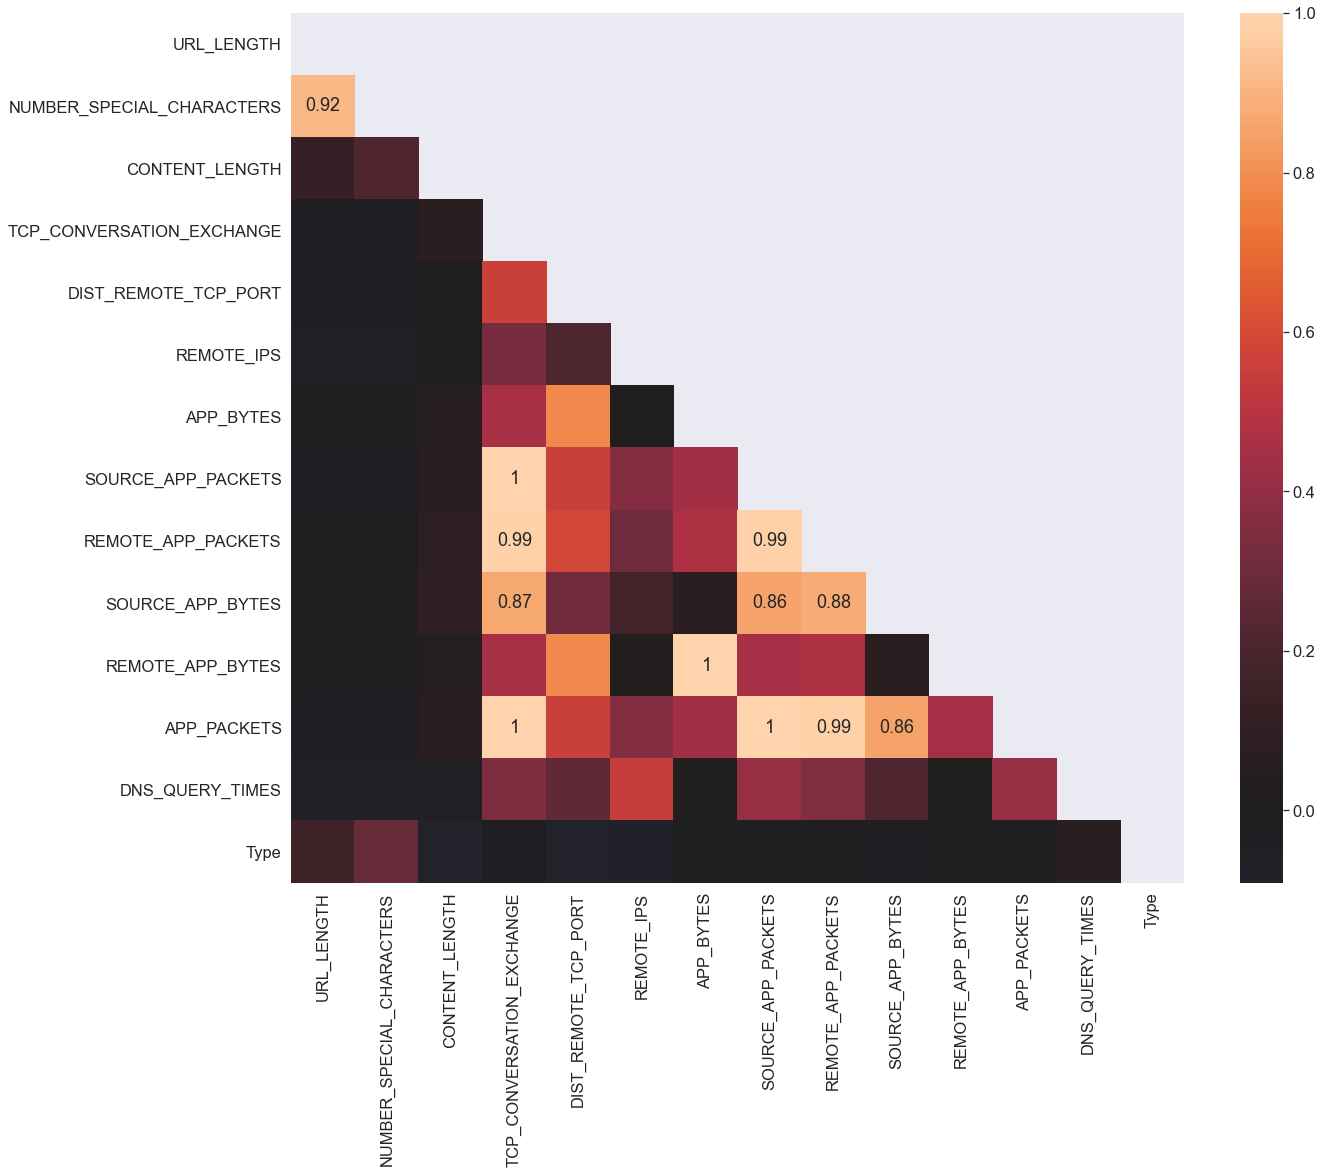

In [8]:
plt.figure(figsize=(20, 16))
sns.set(font_scale=1.5)
mask = np.zeros_like(websites_corr)
mask[np.triu_indices_from(mask)] = True
my_plot = sns.heatmap(websites_corr, mask=mask, center=0, annot=True)

#choose 0.8 as value: just below treshold of 0.9 to keep some extra info
for t in my_plot.texts:
    if float(t.get_text())>=0.8:
        t.set_text(t.get_text()) #if the value is greater than 0.8 then the text is set
    else:
        t.set_text("") # if not it sets an empty text
my_plot;


##### Your comment here
<font color=grey>
    I'm assuming that "Type" is the variable we want to predict (1,0 being benign/malicious). <br>
    Quite a lot of strong correlations between the other variables: <br>
    13 above 0.7<br>
    5 that are between 0.5 and 0.6<br>
    </font>

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

In [9]:
# Your code here
#5 columns with correlations >=0.9
#'TCP_CONVERSATION_EXCHANGE' has 3 values >0.9, and one that's one the brink of the treshold (0.87)
websites_num.drop('TCP_CONVERSATION_EXCHANGE', axis=1, inplace=True) 
websites_num.head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,16,7,263.0,0,2,700,9,10,1153,832,9,2.0,1
1,16,6,15087.0,7,4,1230,17,19,1265,1230,17,0.0,0
2,16,6,324.0,0,0,0,0,0,0,0,0,0.0,0
3,17,6,162.0,22,3,3812,39,37,18784,4380,39,8.0,0
4,17,6,124140.0,2,5,4278,61,62,129889,4586,61,4.0,0


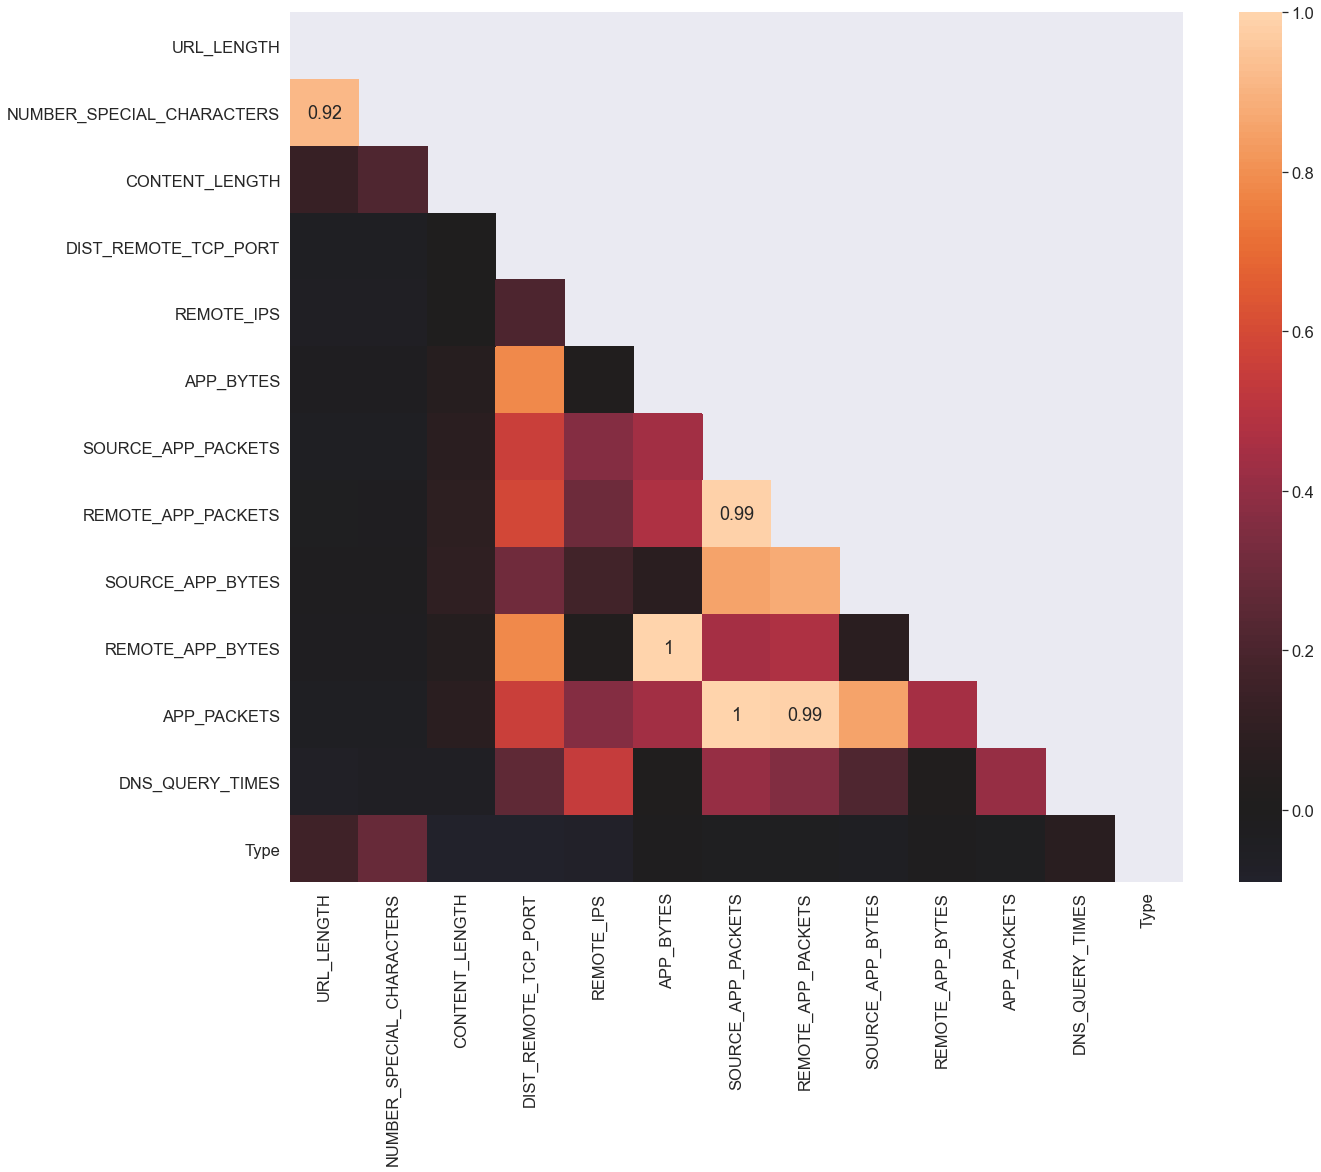

In [10]:
websites_corr = websites_num.corr()
plt.figure(figsize=(20, 16))
sns.set(font_scale=1.5)
mask = np.zeros_like(websites_corr)
mask[np.triu_indices_from(mask)] = True
my_plot = sns.heatmap(websites_corr, mask=mask, center=0, annot=True)

#show only corr_values higher than 0.89, as the treshold is set to 0.9 now
for t in my_plot.texts:
    if float(t.get_text())>=0.9:
        t.set_text(t.get_text()) #if the value is greater than 0.9 then I set the text  
    else:
        t.set_text("") # if not it sets an empty text
my_plot;

In [11]:
websites_num.drop('SOURCE_APP_PACKETS', axis=1, inplace=True) #2 values above 0.9
websites_num.head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,16,7,263.0,0,2,700,10,1153,832,9,2.0,1
1,16,6,15087.0,7,4,1230,19,1265,1230,17,0.0,0
2,16,6,324.0,0,0,0,0,0,0,0,0.0,0
3,17,6,162.0,22,3,3812,37,18784,4380,39,8.0,0
4,17,6,124140.0,2,5,4278,62,129889,4586,61,4.0,0


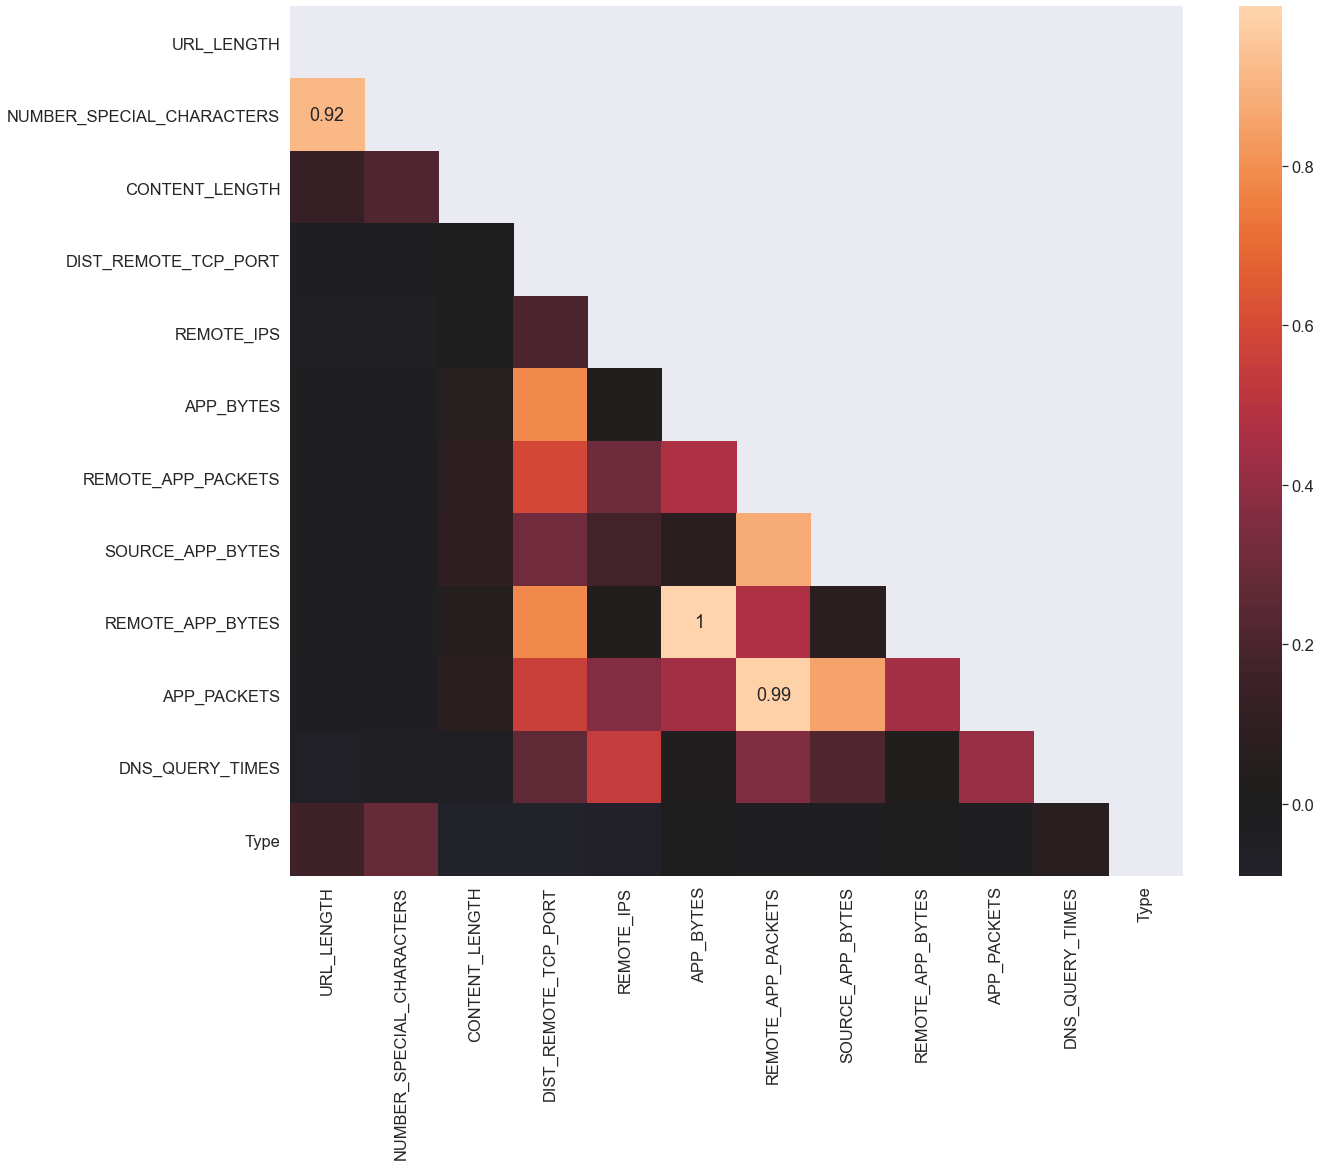

In [12]:
websites_corr = websites_num.corr()
plt.figure(figsize=(20, 16))
sns.set(font_scale=1.5)
mask = np.zeros_like(websites_corr)
mask[np.triu_indices_from(mask)] = True
my_plot = sns.heatmap(websites_corr, mask=mask, center=0, annot=True)

#show only corr_values higher than 0.89, as the treshold is set to 0.9 now
for t in my_plot.texts:
    if float(t.get_text())>=0.9:
        t.set_text(t.get_text()) #if the value is greater than 0.9 then I set the text  
    else:
        t.set_text("") # if not it sets an empty text
my_plot;

In [13]:
#deleting either remote_app_packets or app_packets solves another high correlation. 
websites_num.drop('REMOTE_APP_PACKETS', axis=1, inplace=True) 
websites_num.head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,16,7,263.0,0,2,700,1153,832,9,2.0,1
1,16,6,15087.0,7,4,1230,1265,1230,17,0.0,0
2,16,6,324.0,0,0,0,0,0,0,0.0,0
3,17,6,162.0,22,3,3812,18784,4380,39,8.0,0
4,17,6,124140.0,2,5,4278,129889,4586,61,4.0,0


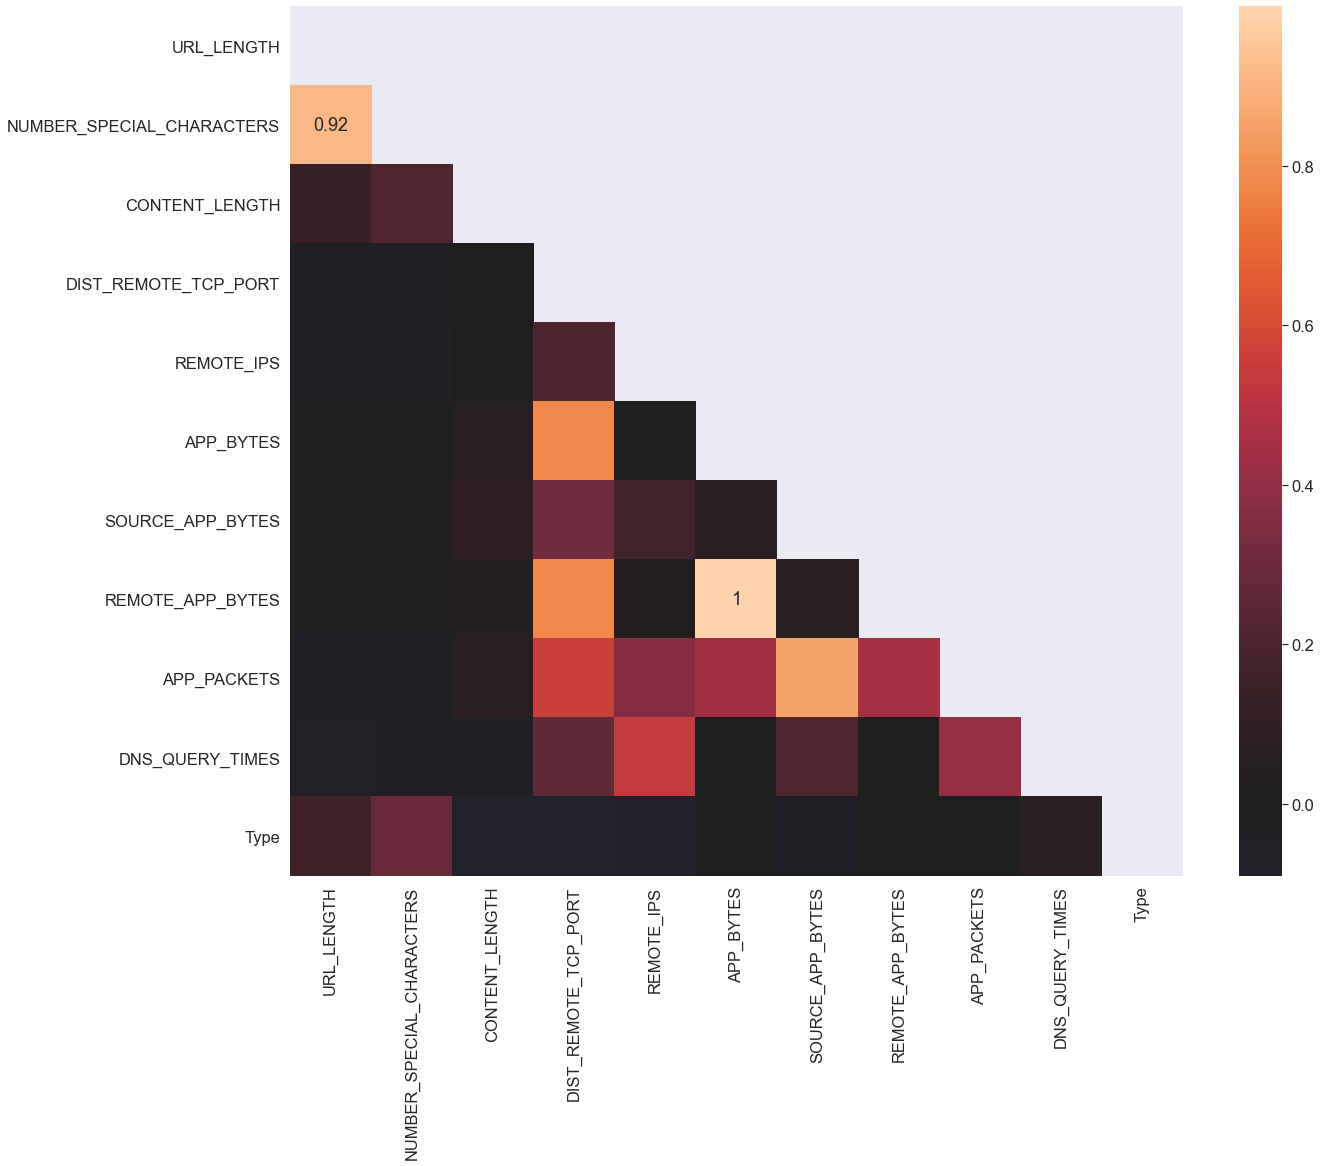

In [14]:
websites_corr = websites_num.corr()
plt.figure(figsize=(20, 16))
sns.set(font_scale=1.5)
mask = np.zeros_like(websites_corr)
mask[np.triu_indices_from(mask)] = True
my_plot = sns.heatmap(websites_corr, mask=mask, center=0, annot=True)

#show only corr_values higher than 0.89, as the treshold is set to 0.9 now
for t in my_plot.texts:
    if float(t.get_text())>=0.9:
        t.set_text(t.get_text()) #if the value is greater than 0.9 then I set the text  
    else:
        t.set_text("") # if not it sets an empty text
my_plot;

In [15]:
#two more to drop, easy to see that dropping the one does not change anything for the other, so I'll drop them simultaneously
websites_num.drop(["URL_LENGTH", "APP_BYTES"], axis=1, inplace=True)
websites_num.head()

,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,DIST_REMOTE_TCP_PORT,REMOTE_IPS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,7,263.0,0,2,1153,832,9,2.0,1
1,6,15087.0,7,4,1265,1230,17,0.0,0
2,6,324.0,0,0,0,0,0,0.0,0
3,6,162.0,22,3,18784,4380,39,8.0,0
4,6,124140.0,2,5,129889,4586,61,4.0,0


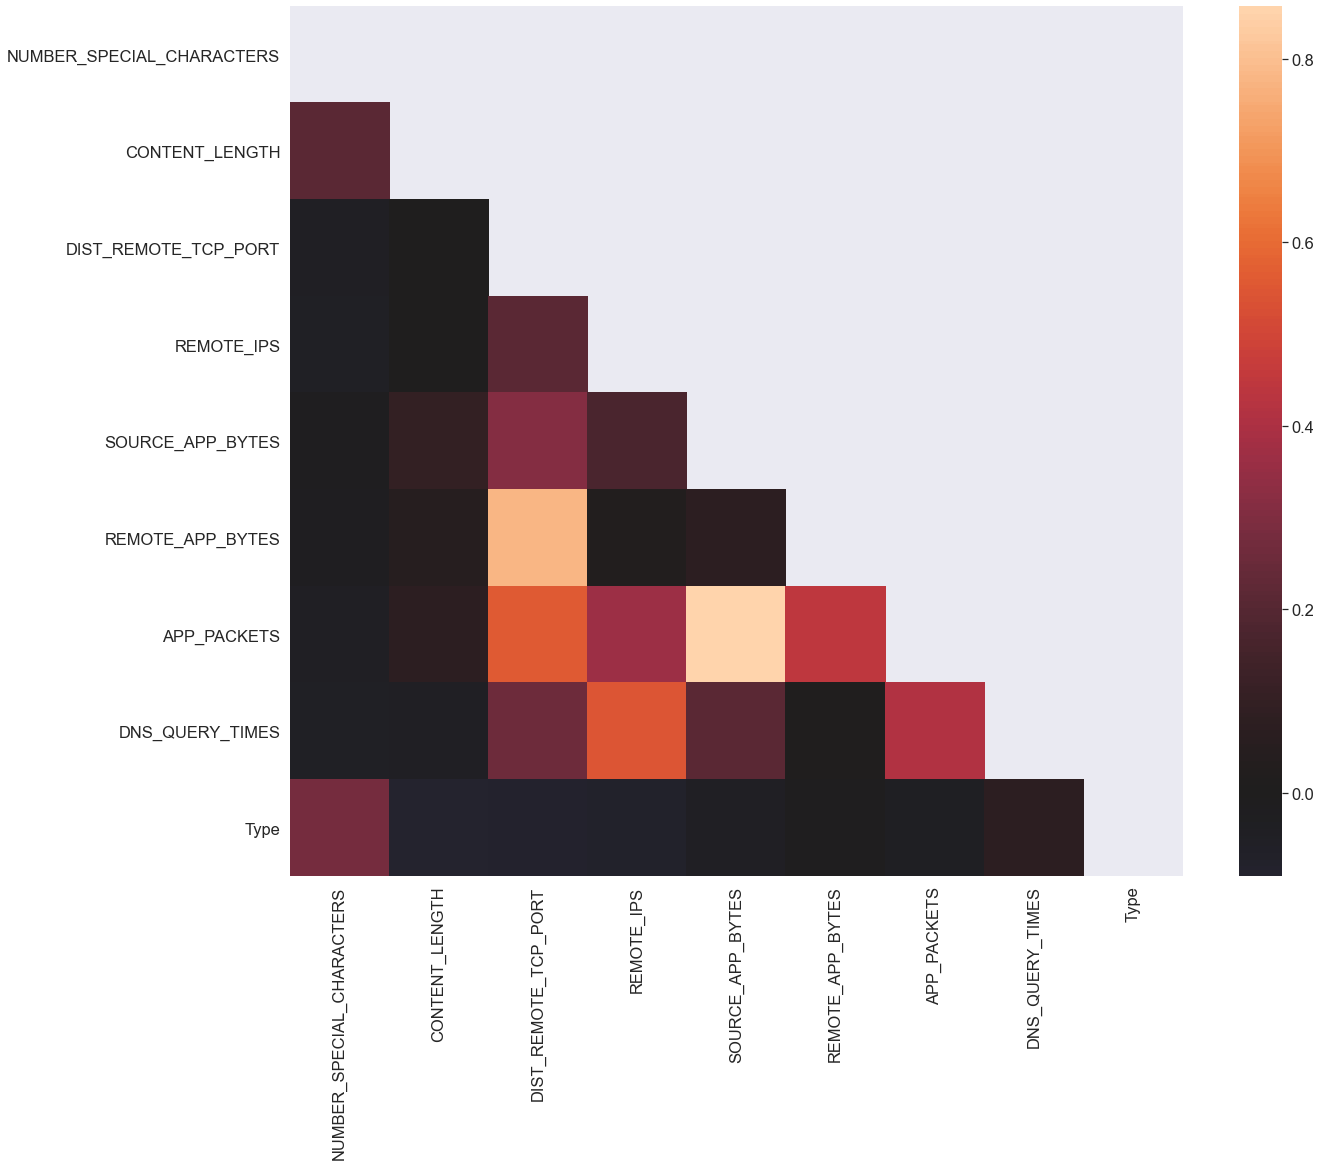

In [16]:
websites_corr = websites_num.corr()
plt.figure(figsize=(20, 16))
sns.set(font_scale=1.5)
mask = np.zeros_like(websites_corr)
mask[np.triu_indices_from(mask)] = True
my_plot = sns.heatmap(websites_corr, mask=mask, center=0, annot=True)

#show only corr_values higher than 0.89, as the treshold is set to 0.9 now
for t in my_plot.texts:
    if float(t.get_text())>=0.9:
        t.set_text(t.get_text()) #if the value is greater than 0.9 then I set the text  
    else:
        t.set_text("") # if not it sets an empty text
my_plot;

<font color=grey>
    The answersheet removes: 'TCP_CONVERSATION_EXCHANGE', <b>'APP_PACKETS'</b>, 'APP_BYTES', 'URL_LENGTH', 'REMOTE_APP_PACKETS'<br> 
I remove: 'TCP_CONVERSATION_EXCHANGE', <b>'SOURCE_APP_PACKETS'</b>, 'APP_BYTES', 'URL_LENGTH', 'REMOTE_APP_PACKETS'
    </font>

In [17]:
#drop the columns from the original dataset
websites.drop(['TCP_CONVERSATION_EXCHANGE', 'SOURCE_APP_PACKETS', 'APP_BYTES', 'URL_LENGTH', 'REMOTE_APP_PACKETS'], axis=1, inplace=True)

# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [18]:
# Your code here
websites.isna().sum()

URL                            0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        0
SERVER                         1
CONTENT_LENGTH               812
WHOIS_COUNTRY                  0
WHOIS_STATEPRO                 0
WHOIS_REGDATE                  0
WHOIS_UPDATED_DATE             0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [19]:
# Your code here
#remove content_length first, the entire column, because it has such a large amount of missing values. 
#And with a bit of luck, the missing value of DNS_QUERY_TIMES and/or SERVER disappears aswell

websites.drop("CONTENT_LENGTH", axis=1, inplace=True)
websites.isna().sum() #unfortunately there is still an NaN in DNS_QUERY_TIMES and SERVER. Handle it in the next cell

URL                          0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       1
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
SOURCE_APP_BYTES             0
REMOTE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              1
Type                         0
dtype: int64

In [20]:
#get index number of row that should be deleted
print(websites["DNS_QUERY_TIMES"].isna().sort_values(ascending=False).head())
print("\n ----------------------------------------------------------\n")
print(websites["SERVER"].isna().sort_values(ascending=False).head())

1659     True
1780    False
596     False
585     False
586     False
Name: DNS_QUERY_TIMES, dtype: bool

 ----------------------------------------------------------

1306     True
611     False
585     False
586     False
587     False
Name: SERVER, dtype: bool


In [21]:
websites.drop([1659,1306], axis=0, inplace=True)

In [22]:
websites = websites.reset_index(drop=True)

In [23]:
#triple-check result
print(websites_num.info())
print("\n----------------------------------------------------------------\n")
print(websites_num.isna().sum())
print("\n----------------------------------------------------------------\n")
print(len(websites_num))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 1   CONTENT_LENGTH             969 non-null    float64
 2   DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 3   REMOTE_IPS                 1781 non-null   int64  
 4   SOURCE_APP_BYTES           1781 non-null   int64  
 5   REMOTE_APP_BYTES           1781 non-null   int64  
 6   APP_PACKETS                1781 non-null   int64  
 7   DNS_QUERY_TIMES            1780 non-null   float64
 8   Type                       1781 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 125.4 KB
None

----------------------------------------------------------------

NUMBER_SPECIAL_CHARACTERS      0
CONTENT_LENGTH               812
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
SOURCE_APP_BYTES      

#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [24]:
# Examine missing values in each column
#see above (answer sheet does nothing with "none" as string values, so guess these 'None'-values are considered informative)

# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [25]:
# Your code here
websites["WHOIS_COUNTRY"].unique()

array(['None', 'US', 'SC', 'GB', 'UK', 'RU', 'AU', 'CA', 'PA', 'se', 'IN',
       'LU', 'TH', "[u'GB'; u'UK']", 'FR', 'NL', 'UG', 'JP', 'CN', 'SE',
       'SI', 'IL', 'ru', 'KY', 'AT', 'CZ', 'PH', 'BE', 'NO', 'TR', 'LV',
       'DE', 'ES', 'BR', 'us', 'KR', 'HK', 'UA', 'CH', 'United Kingdom',
       'BS', 'PK', 'IT', 'Cyprus', 'BY', 'AE', 'IE', 'UY', 'KG'],
      dtype=object)

In [26]:
for i in range(len(websites["WHOIS_COUNTRY"])):
    if type(websites["WHOIS_COUNTRY"][i])==str:
        websites.loc[i, "WHOIS_COUNTRY"] = str.upper(websites["WHOIS_COUNTRY"][i])
    if websites["WHOIS_COUNTRY"][i] =='UNITED KINGDOM':
        websites.loc[i, "WHOIS_COUNTRY"] ='UK'
    if websites["WHOIS_COUNTRY"][i] =='GB':
        websites.loc[i, "WHOIS_COUNTRY"] ='UK'
    if websites["WHOIS_COUNTRY"][i]=="[U'GB'; U'UK']":
        websites.loc[i, "WHOIS_COUNTRY"] ='UK'
    if websites["WHOIS_COUNTRY"][i] =="CYPRUS":
        websites.loc[i, "WHOIS_COUNTRY"] ='CY'

In [72]:
websites["WHOIS_COUNTRY"].unique()

array(['NONE', 'US', 'OTHER', 'UK', 'AU', 'CA', 'PA', 'IN', 'JP', 'CN',
       'ES'], dtype=object)

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

<AxesSubplot:>

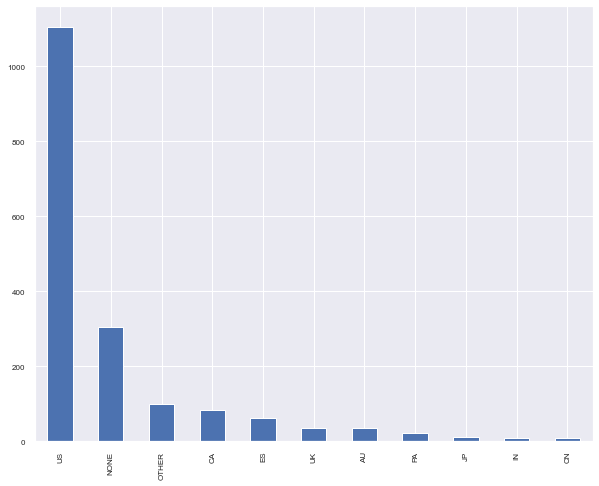

In [77]:
# Your code here
websites["WHOIS_COUNTRY"].value_counts().plot(kind="bar", fontsize=8, figsize=(10,8))

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [29]:
# Your code here
#write the top 10 values to variable
topten = websites["WHOIS_COUNTRY"].value_counts(ascending=False)[0:10]
topten 

US      1105
NONE     306
CA        83
ES        63
AU        35
UK        35
PA        21
JP        11
IN        10
CN        10
Name: WHOIS_COUNTRY, dtype: int64

In [30]:
#grab the index in a list
topten = topten.index.tolist()
topten

['US', 'NONE', 'CA', 'ES', 'AU', 'UK', 'PA', 'JP', 'IN', 'CN']

In [31]:
#check if the value is in the topten-list, if not: replace the value with "other"
for i in range(len(websites)):
    if websites["WHOIS_COUNTRY"][i] not in topten:
        websites.loc[i, "WHOIS_COUNTRY"] = "OTHER"

In [32]:
#double check
print(len(websites),"\n------\n", websites["WHOIS_COUNTRY"].value_counts().sum(), "\n------\n", websites["WHOIS_COUNTRY"].value_counts())

1779 
------
 1779 
------
 US       1105
NONE      306
OTHER     100
CA         83
ES         63
UK         35
AU         35
PA         21
JP         11
IN         10
CN         10
Name: WHOIS_COUNTRY, dtype: int64


Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [33]:
# Your code here
websites.drop(['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'], axis=1, inplace=True)

In [34]:
websites.reset_index(drop=True)

,URL,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_COUNTRY,DIST_REMOTE_TCP_PORT,REMOTE_IPS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,7,iso-8859-1,nginx,NONE,0,2,1153,832,9,2.0,1
1,B0_2314,6,UTF-8,Apache/2.4.10,NONE,7,4,1265,1230,17,0.0,0
2,B0_911,6,us-ascii,Microsoft-HTTPAPI/2.0,NONE,0,0,0,0,0,0.0,0
3,B0_113,6,ISO-8859-1,nginx,US,22,3,18784,4380,39,8.0,0
4,B0_403,6,UTF-8,None,US,2,5,129889,4586,61,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1774,M4_48,16,UTF-8,Apache,ES,0,0,186,0,0,0.0,1
1775,M4_41,17,UTF-8,Apache,ES,0,0,124,0,0,0.0,1
1776,B0_162,34,utf-8,Apache/2.2.16 (Debian),US,2,6,132181,6945,87,4.0,0
1777,B0_1152,34,ISO-8859-1,cloudflare-nginx,US,0,0,0,0,0,0.0,0


In [35]:
websites.columns

Index(['URL', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'WHOIS_COUNTRY', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS',
       'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES', 'APP_PACKETS',
       'DNS_QUERY_TIMES', 'Type'],
      dtype='object')

# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [36]:
# Your code here
websites.dtypes.sort_values()

NUMBER_SPECIAL_CHARACTERS      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
Type                           int64
DNS_QUERY_TIMES              float64
URL                           object
CHARSET                       object
SERVER                        object
WHOIS_COUNTRY                 object
dtype: object

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [37]:
# Your code here
websites = websites.drop(['URL'], axis=1).reset_index(drop=True)

#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [38]:
# Your code here
websites["CHARSET"].unique()

array(['iso-8859-1', 'UTF-8', 'us-ascii', 'ISO-8859-1', 'utf-8', 'None',
       'windows-1251', 'ISO-8859', 'windows-1252'], dtype=object)

In [39]:
websites["CHARSET"].value_counts() 

UTF-8           674
ISO-8859-1      427
utf-8           379
us-ascii        155
iso-8859-1      134
None              7
windows-1252      1
ISO-8859          1
windows-1251      1
Name: CHARSET, dtype: int64

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [40]:
# Your code here
websites["SERVER"].unique()

array(['nginx', 'Apache/2.4.10', 'Microsoft-HTTPAPI/2.0', 'None',
       'Apache/2', 'nginx/1.10.1', 'Apache', 'Apache/2.2.15 (Red Hat)',
       'Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'openresty/1.11.2.1', 'Apache/2.2.22', 'Apache/2.4.7 (Ubuntu)',
       'nginx/1.12.0',
       'Apache/2.4.12 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'Oracle-iPlanet-Web-Server/7.0', 'cloudflare-nginx', 'nginx/1.6.2',
       'openresty', 'Heptu web server', 'Pepyaka/1.11.3', 'nginx/1.8.0',
       'nginx/1.10.1 + Phusion Passenger 5.0.30',
       'Apache/2.2.29 (Amazon)', 'Microsoft-IIS/7.5', 'LiteSpeed',
       'Apache/2.4.25 (cPanel) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'tsa_c', 'Apache/2.2.0 (Fedora)', 'Apache/2.2.22 (Debian)',
       'Apache/2.2.15 (CentOS)', 'Apache/2.4.25',
       'Apache/2.4.25 (Amazon) PHP/7.0.14', 'GSE',
       'Apache/2.4.23 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4',
       'Apache/2.4.25 (Amazon) OpenSSL/1.0.1k-fips'

<font color=grey>
#####Your comment here<br>
If  the cell contains a '/', keep only the part that is in front of the slash, and see what's left. Have a look if there's some usefull ones left, and change the rest (like "Pizza") into "unknown"
    </font>

Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [41]:
# Your code here
server_list = ["microsoft", "apache", "nginx"]

for i in range(len(websites)):
    for j in range(len(server_list)):
        if server_list[j] in str.lower(websites["SERVER"][i]):
            websites.loc[i, "SERVER"]=server_list[j]
        if str.lower(websites["SERVER"][i]) not in server_list:
            websites.loc[i, "SERVER"]="other"


In [42]:
# Count `SERVER` value counts here
websites["SERVER"].value_counts()

other        985
apache       385
nginx        211
microsoft    198
Name: SERVER, dtype: int64

OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)).** Make sure you drop the categorical columns by passing `drop_first=True` to `get_dummies` as we don't need them any more. **Also, assign the data with dummy values to a new variable `website_dummy`.**

In [43]:
websites["SERVER"].unique()

array(['nginx', 'other', 'microsoft', 'apache'], dtype=object)

In [44]:
# Your code here
website_dummy= pd.get_dummies(websites, columns=["SERVER", "CHARSET", "WHOIS_COUNTRY"], drop_first=True) 
#drop first because when all others are 0, you already know the first one is 1.


Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [45]:
# Your code here
print(website_dummy.columns)
website_dummy.dtypes.sort_values()

Index(['NUMBER_SPECIAL_CHARACTERS', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS',
       'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES', 'APP_PACKETS',
       'DNS_QUERY_TIMES', 'Type', 'SERVER_microsoft', 'SERVER_nginx',
       'SERVER_other', 'CHARSET_ISO-8859-1', 'CHARSET_None', 'CHARSET_UTF-8',
       'CHARSET_iso-8859-1', 'CHARSET_us-ascii', 'CHARSET_utf-8',
       'CHARSET_windows-1251', 'CHARSET_windows-1252', 'WHOIS_COUNTRY_CA',
       'WHOIS_COUNTRY_CN', 'WHOIS_COUNTRY_ES', 'WHOIS_COUNTRY_IN',
       'WHOIS_COUNTRY_JP', 'WHOIS_COUNTRY_NONE', 'WHOIS_COUNTRY_OTHER',
       'WHOIS_COUNTRY_PA', 'WHOIS_COUNTRY_UK', 'WHOIS_COUNTRY_US'],
      dtype='object')


CHARSET_iso-8859-1             uint8
WHOIS_COUNTRY_PA               uint8
WHOIS_COUNTRY_OTHER            uint8
WHOIS_COUNTRY_NONE             uint8
WHOIS_COUNTRY_JP               uint8
WHOIS_COUNTRY_IN               uint8
WHOIS_COUNTRY_ES               uint8
WHOIS_COUNTRY_CN               uint8
WHOIS_COUNTRY_CA               uint8
CHARSET_windows-1252           uint8
CHARSET_windows-1251           uint8
CHARSET_utf-8                  uint8
CHARSET_us-ascii               uint8
WHOIS_COUNTRY_UK               uint8
WHOIS_COUNTRY_US               uint8
CHARSET_None                   uint8
CHARSET_ISO-8859-1             uint8
SERVER_other                   uint8
SERVER_nginx                   uint8
SERVER_microsoft               uint8
CHARSET_UTF-8                  uint8
Type                           int64
APP_PACKETS                    int64
REMOTE_APP_BYTES               int64
SOURCE_APP_BYTES               int64
REMOTE_IPS                     int64
DIST_REMOTE_TCP_PORT           int64
N

# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [46]:
website_dummy.columns

Index(['NUMBER_SPECIAL_CHARACTERS', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS',
       'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES', 'APP_PACKETS',
       'DNS_QUERY_TIMES', 'Type', 'SERVER_microsoft', 'SERVER_nginx',
       'SERVER_other', 'CHARSET_ISO-8859-1', 'CHARSET_None', 'CHARSET_UTF-8',
       'CHARSET_iso-8859-1', 'CHARSET_us-ascii', 'CHARSET_utf-8',
       'CHARSET_windows-1251', 'CHARSET_windows-1252', 'WHOIS_COUNTRY_CA',
       'WHOIS_COUNTRY_CN', 'WHOIS_COUNTRY_ES', 'WHOIS_COUNTRY_IN',
       'WHOIS_COUNTRY_JP', 'WHOIS_COUNTRY_NONE', 'WHOIS_COUNTRY_OTHER',
       'WHOIS_COUNTRY_PA', 'WHOIS_COUNTRY_UK', 'WHOIS_COUNTRY_US'],
      dtype='object')

In [47]:
from sklearn.model_selection import train_test_split

# Your code here:
X=website_dummy[['NUMBER_SPECIAL_CHARACTERS', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS',
       'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES', 'APP_PACKETS',
       'DNS_QUERY_TIMES', 'Type', 'SERVER_microsoft', 'SERVER_nginx',
       'SERVER_other', 'CHARSET_ISO-8859-1', 'CHARSET_None', 'CHARSET_UTF-8',
       'CHARSET_iso-8859-1', 'CHARSET_us-ascii', 'CHARSET_utf-8',
       'CHARSET_windows-1251', 'CHARSET_windows-1252', 'WHOIS_COUNTRY_CA',
       'WHOIS_COUNTRY_CN', 'WHOIS_COUNTRY_ES', 'WHOIS_COUNTRY_IN',
       'WHOIS_COUNTRY_JP', 'WHOIS_COUNTRY_NONE', 'WHOIS_COUNTRY_OTHER',
       'WHOIS_COUNTRY_PA', 'WHOIS_COUNTRY_UK', 'WHOIS_COUNTRY_US']]

y=website_dummy["Type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#check if train and test went right
print(len(X_train), len(X_test), len(y_train), len(y_test))
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

1423 356 1423 356
(1423, 29) (356, 29) (1423,) (356,)


#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [48]:
# Your code here:
from sklearn.linear_model import LogisticRegression

Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [49]:
# Your code here:
model = LogisticRegression(max_iter=10000) #choose model
results= model.fit(X_train, y_train) #fit model to training data
y_train_predictions = results.predict(X_train) #predictions on training data
y_test_predictions = results.predict(X_test) #predictions on test data

In [50]:
#just to eyeball
compare_train = pd.DataFrame({"actual": y_train, "prediction":y_train_predictions})
compare_train.head(20)

,actual,prediction
325,0,0
287,0,0
616,0,0
445,0,0
465,0,0
717,0,0
773,0,0
523,0,0
1496,1,1
1655,0,0


finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [52]:
print(confusion_matrix(y_train, y_train_predictions))
accuracy_score(y_train, y_train_predictions) 

[[1255    0]
 [   1  167]]


0.9992972593113141

In [53]:
print(confusion_matrix(y_test, y_test_predictions))
accuracy_score(y_test, y_test_predictions) 

[[308   0]
 [  0  48]]


1.0

What are your thoughts on the performance of the model? Write your conclusions below.

<font color = grey>
##### Your conclusions here:<br>
the model works similarly well on both the train and test data. Both predict the outcome (in this run) correctly in (almost) 100% on both the test and train data </font>

In [78]:
#I do not trust the accuracy score of 1 (I get it repeatedly, also in fresh runs). I check if the model sometimes get's it wrong too. 
# I let it make 25 train_test_split sets by looping over the code

X=website_dummy[['NUMBER_SPECIAL_CHARACTERS', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS',
       'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES', 'APP_PACKETS',
       'DNS_QUERY_TIMES', 'Type', 'SERVER_microsoft', 'SERVER_nginx',
       'SERVER_other', 'CHARSET_ISO-8859-1', 'CHARSET_None', 'CHARSET_UTF-8',
       'CHARSET_iso-8859-1', 'CHARSET_us-ascii', 'CHARSET_utf-8',
       'CHARSET_windows-1251', 'CHARSET_windows-1252', 'WHOIS_COUNTRY_CA',
       'WHOIS_COUNTRY_CN', 'WHOIS_COUNTRY_ES', 'WHOIS_COUNTRY_IN',
       'WHOIS_COUNTRY_JP', 'WHOIS_COUNTRY_NONE', 'WHOIS_COUNTRY_OTHER',
       'WHOIS_COUNTRY_PA', 'WHOIS_COUNTRY_UK', 'WHOIS_COUNTRY_US']]

y=website_dummy["Type"]


accuracy_list = []


for i in range(0,25):
    X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.2) #add _1 to not mess with the other split

    model = LogisticRegression(max_iter=10000) #choose model
    results= model.fit(X_train_1, y_train_1) #fit model to training data
    y_train_1_predictions = results.predict(X_train_1) #predictions on training data
    y_test_1_predictions = results.predict(X_test_1) #predictions on test data

    accuracy_list.append(accuracy_score(y_train_1, y_train_predictions))

print(accuracy_list) #not all ones, some outcomes seem the same, check using set:
print("\n-----------------------------------\n")
print(set(accuracy_list)) #so the model does not always get it right in 100% of the cases, which is reassuring I guess.

[0.7997189037245257, 0.803232607167955, 0.803232607167955, 0.7969079409697821, 0.7997189037245257, 0.7990161630358398, 0.7997189037245257, 0.808854532677442, 0.7814476458186929, 0.8004216444132115, 0.8060435699226985, 0.8053408292340126, 0.8025298664792692, 0.7990161630358398, 0.8004216444132115, 0.8011243851018974, 0.8018271257905832, 0.803232607167955, 0.8018271257905832, 0.808854532677442, 0.7962052002810963, 0.803232607167955, 0.8046380885453268, 0.797610681658468, 0.7940969782150387]

-----------------------------------

{0.7997189037245257, 0.803232607167955, 0.808854532677442, 0.7990161630358398, 0.7969079409697821, 0.7814476458186929, 0.8004216444132115, 0.8060435699226985, 0.8053408292340126, 0.8025298664792692, 0.8018271257905832, 0.7962052002810963, 0.797610681658468, 0.8011243851018974, 0.7940969782150387, 0.8046380885453268}


#### Our second algorithm is is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [55]:
# Your code here:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
result = model.fit(X_train, y_train)

y_train_predictions = result.predict(X_train) #predictions on training data
y_test_predictions = result.predict(X_test) #predictions on test data

To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

In [56]:
# Your code here:
print("confusion matrix - training data:\n", confusion_matrix(y_train, y_train_predictions))
print("\n----------------------------------------\n")
print("accuracy_score - training data:\n", accuracy_score(y_train, y_train_predictions))
print("\n========================================\n")
print("confusion matrix - test data:\n", confusion_matrix(y_test, y_test_predictions))
print("\n----------------------------------------\n")
print("accuracy_score - test data:\n", accuracy_score(y_test, y_test_predictions))


confusion matrix - training data:
 [[1235   20]
 [  42  126]]

----------------------------------------

accuracy_score - training data:
 0.9564300773014758


confusion matrix - test data:
 [[296  12]
 [ 14  34]]

----------------------------------------

accuracy_score - test data:
 0.9269662921348315


#### We'll create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [57]:
# Your code here:
model_5 = KNeighborsClassifier(n_neighbors=5) #pick model
result_5 = model_5.fit(X_train, y_train) #fit model on training data

y_train_predictions_5 = result_5.predict(X_train) #predictions on training data
y_test_predictions_5 = result_5.predict(X_test) #predictions on test data

print("confusion matrix - training data:\n", confusion_matrix(y_train, y_train_predictions_5))
print("\n----------------------------------------\n")
print("accuracy_score - training data:\n", accuracy_score(y_train, y_train_predictions_5))
print("\n========================================\n")
print("confusion matrix - test data:\n", confusion_matrix(y_test, y_test_predictions_5))
print("\n----------------------------------------\n")
print("accuracy_score - test data:\n", accuracy_score(y_test, y_test_predictions_5))


confusion matrix - training data:
 [[1229   26]
 [  47  121]]

----------------------------------------

accuracy_score - training data:
 0.9486999297259311


confusion matrix - test data:
 [[300   8]
 [ 14  34]]

----------------------------------------

accuracy_score - test data:
 0.9382022471910112


Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

<font color=grey>
##### Your conclusions here:<br>
The K=5 performs slightly better than the K=3 on the test score, but less well than the logistic regression (accuracy of almost 1).
    </font>

# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [58]:
# Your code here
print(website_dummy.columns)
website_dummy.head()

Index(['NUMBER_SPECIAL_CHARACTERS', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS',
       'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES', 'APP_PACKETS',
       'DNS_QUERY_TIMES', 'Type', 'SERVER_microsoft', 'SERVER_nginx',
       'SERVER_other', 'CHARSET_ISO-8859-1', 'CHARSET_None', 'CHARSET_UTF-8',
       'CHARSET_iso-8859-1', 'CHARSET_us-ascii', 'CHARSET_utf-8',
       'CHARSET_windows-1251', 'CHARSET_windows-1252', 'WHOIS_COUNTRY_CA',
       'WHOIS_COUNTRY_CN', 'WHOIS_COUNTRY_ES', 'WHOIS_COUNTRY_IN',
       'WHOIS_COUNTRY_JP', 'WHOIS_COUNTRY_NONE', 'WHOIS_COUNTRY_OTHER',
       'WHOIS_COUNTRY_PA', 'WHOIS_COUNTRY_UK', 'WHOIS_COUNTRY_US'],
      dtype='object')


,NUMBER_SPECIAL_CHARACTERS,DIST_REMOTE_TCP_PORT,REMOTE_IPS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type,SERVER_microsoft,SERVER_nginx,SERVER_other,CHARSET_ISO-8859-1,CHARSET_None,CHARSET_UTF-8,CHARSET_iso-8859-1,CHARSET_us-ascii,CHARSET_utf-8,CHARSET_windows-1251,CHARSET_windows-1252,WHOIS_COUNTRY_CA,WHOIS_COUNTRY_CN,WHOIS_COUNTRY_ES,WHOIS_COUNTRY_IN,WHOIS_COUNTRY_JP,WHOIS_COUNTRY_NONE,WHOIS_COUNTRY_OTHER,WHOIS_COUNTRY_PA,WHOIS_COUNTRY_UK,WHOIS_COUNTRY_US
0,7,0,2,1153,832,9,2.0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,6,7,4,1265,1230,17,0.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,6,0,0,0,0,0,0.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,6,22,3,18784,4380,39,8.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,6,2,5,129889,4586,61,4.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


columns that could potentially by scaled are:<br>
<ul>
<li>'NUMBER_SPECIAL_CHARACTERS', </li>
<li>'DIST_REMOTE_TCP_PORT', </li>
<li>'REMOTE_IPS',</li>
<li>'SOURCE_APP_BYTES', </li>
<li>'REMOTE_APP_BYTES',</li> 
<li>'APP_PACKETS',</li>
    <li>'DNS_QUERY_TIMES'</li>
</ul>
The others are already transformed.


In [59]:
from sklearn.preprocessing import RobustScaler

In [84]:
#according to: https://www.youtube.com/watch?v=1lCWNcR4iW0

scaler = RobustScaler().fit(X_train) #fit the RobustScaler to the train data
scaled_X_train = scaler.transform(X_train) #transform the X-data

scaled_X_test = scaler.transform(X_test) #transform the X-data using the scaler that is 'calibrated' on the X_train data

model=LogisticRegression() #choose model
results = model.fit(scaled_X_train, y_train) #fit model to scaled X_train data

y_train_scaled_predictions = results.predict(scaled_X_train) #predictions on training data
y_test_scaled_predictions = results.predict(scaled_X_test) #predictions on test data


print("confusion matrix - training data:\n", confusion_matrix(y_train,  y_train_scaled_predictions))
print("\n----------------------------------------\n")
print("accuracy_score - training data:\n", accuracy_score(y_train,  y_train_scaled_predictions))
print("\n========================================\n")
print("confusion matrix - test data:\n", confusion_matrix(y_test, y_test_scaled_predictions))
print("\n----------------------------------------\n")
print("accuracy_score - test data:\n", accuracy_score(y_test, y_test_scaled_predictions))

confusion matrix - training data:
 [[1255    0]
 [   0  168]]

----------------------------------------

accuracy_score - training data:
 1.0


confusion matrix - test data:
 [[308   0]
 [  0  48]]

----------------------------------------

accuracy_score - test data:
 1.0


<font color=grey>
    ##### comment<br>
    Both end up scoring 100% accurate. 
    Try with KNN aswell (below) that one seems to improve.
    </font>

In [85]:
model = KNeighborsClassifier(n_neighbors=3) #pick model
results_k = model.fit(scaled_X_train, y_train) #fit model on training data

scaled_train_predict = results_k.predict(scaled_X_train) #predictions on training data
scaled_test_predict = results_k.predict(scaled_X_test) #predictions on test data

print("confusion matrix - training data:\n", confusion_matrix(y_train, scaled_train_predict))
print("\n----------------------------------------\n")
print("accuracy_score - training data:\n", accuracy_score(y_train, scaled_train_predict))
print("\n========================================\n")
print("confusion matrix - test data:\n", confusion_matrix(y_test, scaled_test_predict))
print("\n----------------------------------------\n")
print("accuracy_score - test data:\n", accuracy_score(y_test, scaled_test_predict))


confusion matrix - training data:
 [[1253    2]
 [  14  154]]

----------------------------------------

accuracy_score - training data:
 0.988756148981026


confusion matrix - test data:
 [[305   3]
 [  4  44]]

----------------------------------------

accuracy_score - test data:
 0.9803370786516854
